<a href="https://colab.research.google.com/github/Rishisrv147025/Data_Science_Project/blob/main/Un_supervised_video_game_sale_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Video Game Dataset Analysis Using Unsupervised Learning**

In [264]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [265]:
#importing the dataset
dataset=pd.read_excel('/content/drive/MyDrive/vid_game_sale.xlsx')

In [266]:
#Checking whether the dataset has been properly imported or not
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


# Data Cleaning

In [267]:
#checking if there is any missing values in the dataset
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,29
Genre,0
Publisher,2
North America,0
Europe,0
Japan,0
Rest of World,0


In [268]:
#importing the imputer library to fill the missing values
from sklearn.impute import SimpleImputer

In [269]:
#Creating the object for imputer library
num_imputer=SimpleImputer(strategy='mean')
cat_imputer=SimpleImputer(strategy='most_frequent')

In [270]:
#Filling the dataset using imputer
dataset['Year']=num_imputer.fit_transform(dataset[['Year']])

In [271]:
#Using the imputer to fill the publisher data's in the dataset
dataset['Publisher']=cat_imputer.fit_transform(dataset['Publisher'].values.reshape(-1,1))[:,0]

In [272]:
#After applying the imputer function checking if there is any missing values in the dataset
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,0
Genre,0
Publisher,0
North America,0
Europe,0
Japan,0
Rest of World,0


In [273]:
#Converting the dataset from object to integers.
dataset['Year']=dataset['Year'].astype(int)

In [274]:
#After conversion checking whether it has been properly converted or not
dataset['Year'].dtypes

dtype('int64')

# Uni-Varite Analysis

In [275]:
#Checking for the number of values in the rank column.
dataset['Rank'].value_counts()

,count
Rank,
1,1
1268,1
1280,1
1279,1
1278,1
...,...
632,1
631,1
630,1


Text(0.5, 0.98, 'Hist of North America')

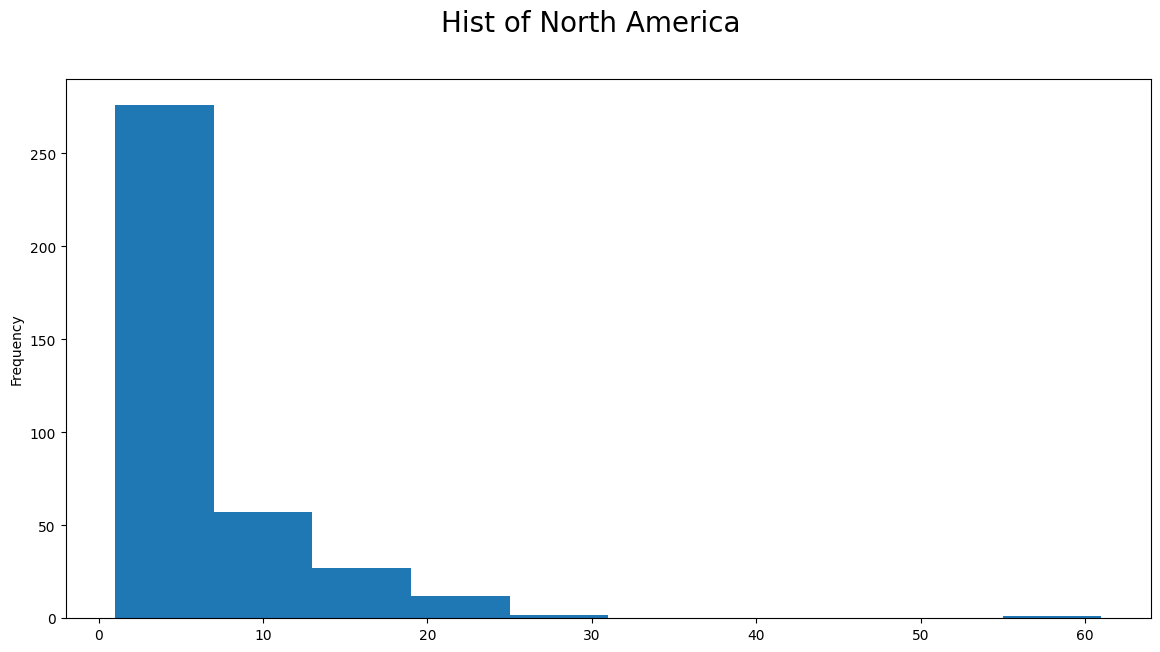

In [276]:
#Visualizing the North america values.
dataset['North America'].value_counts().plot(kind='hist',figsize=(14,7))
plt.suptitle('Hist of North America',fontsize=20)

Text(0.5, 0.98, 'Countplot of Europe')

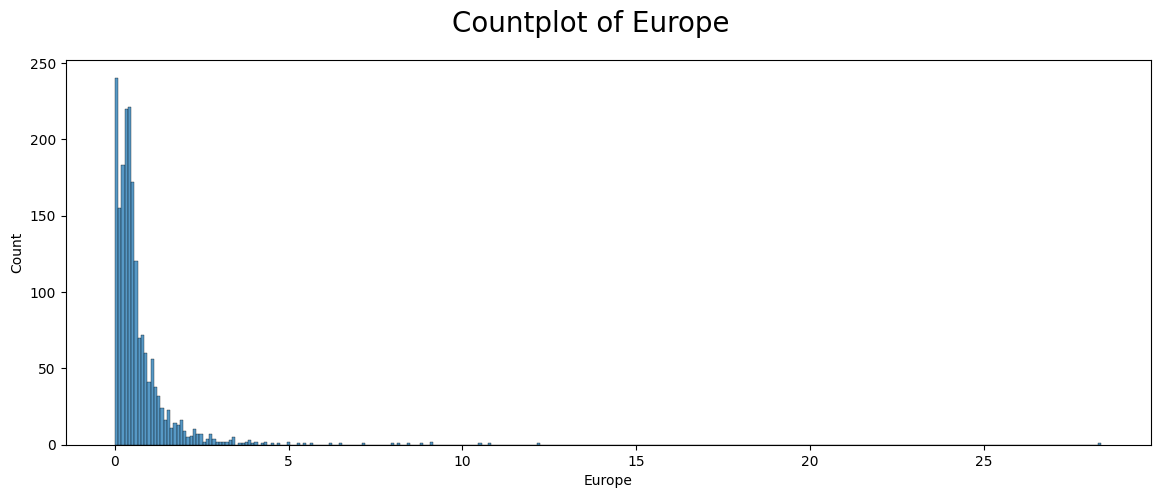

In [277]:
#Visualizing the Europe data in the dataset.
plt.figure(figsize=(14,5))
sns.histplot(dataset,x='Europe')
plt.suptitle('Countplot of Europe',fontsize=20)

Text(0.5, 0.98, 'Comapring the values of Japan in the dataset')

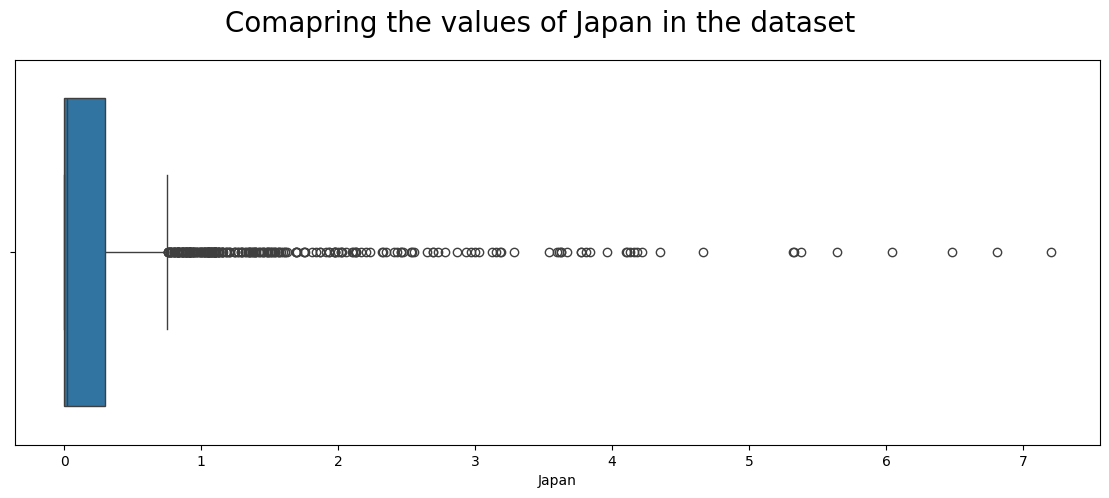

In [278]:
#Visualizing the japan dataset using boxplot
plt.figure(figsize=(14,5))
sns.boxplot(dataset,x='Japan')
plt.suptitle('Comapring the values of Japan in the dataset',fontsize=20)

Text(0.5, 0.98, 'Countplot of Global')

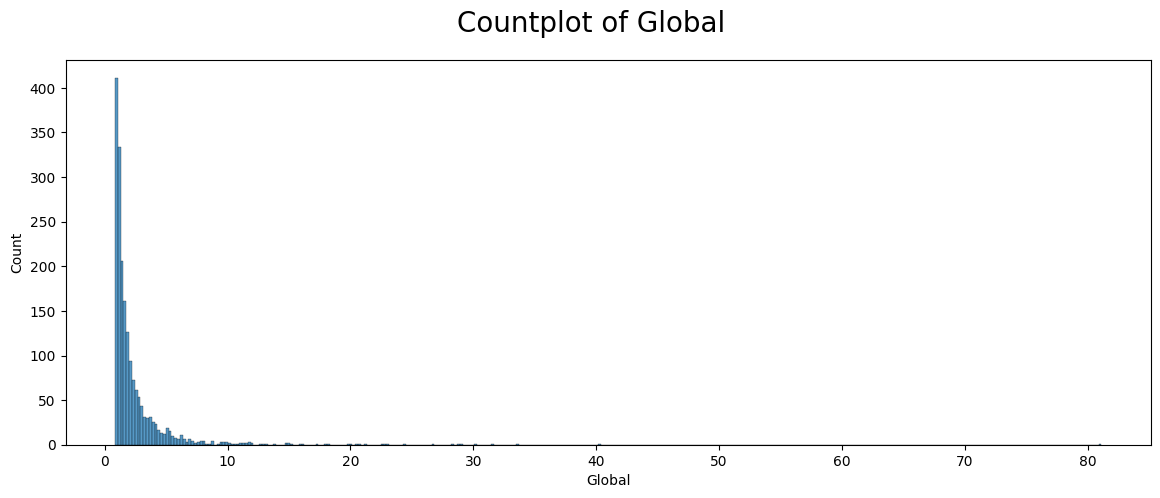

In [279]:
#Visualizing the Europe data in the dataset.
plt.figure(figsize=(14,5))
sns.histplot(dataset,x='Global')
plt.suptitle('Countplot of Global',fontsize=20)

Text(0.5, 0.98, 'Hist of Rest of World')

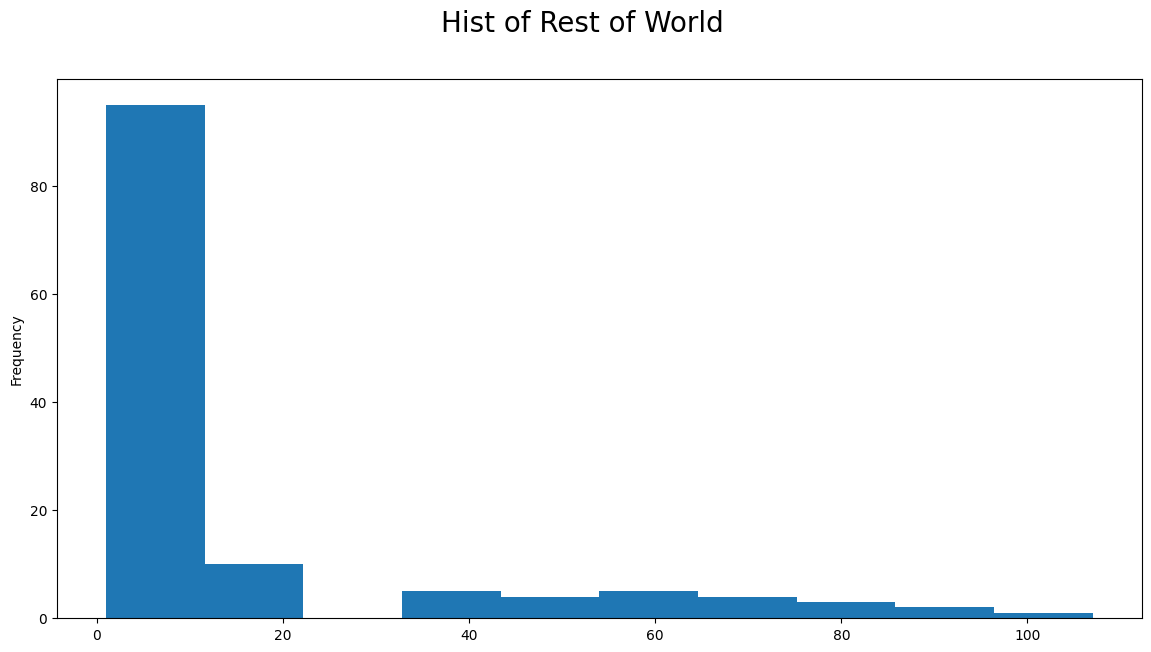

In [280]:
#Visualizing the North america values.
dataset['Rest of World'].value_counts().plot(kind='hist',figsize=(14,7))
plt.suptitle('Hist of Rest of World',fontsize=20)

# Bi-Variate Analysis

Text(0.5, 0.98, 'lineplot of Rank Vs Review')

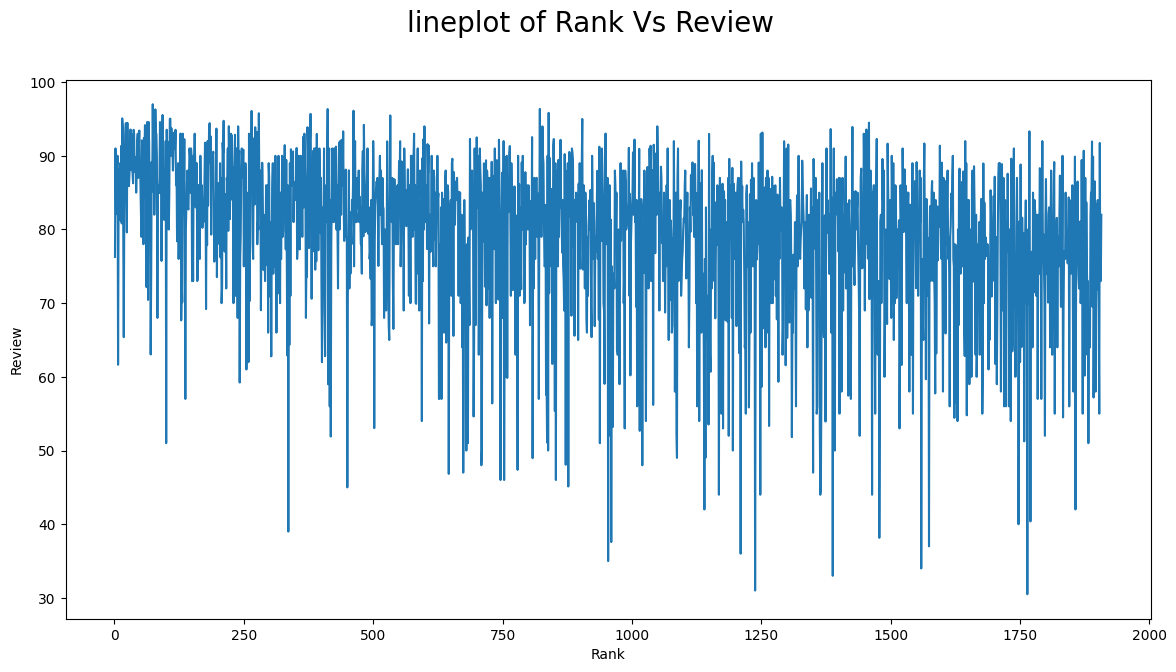

In [281]:
#Comparing the Rank and Reviews in the dataset
plt.figure(figsize=(14,7))
sns.lineplot(dataset,x='Rank',y='Review')
plt.suptitle('lineplot of Rank Vs Review',fontsize=20)

Text(0.5, 0.98, 'Scatterplot of Rank Vs North America')

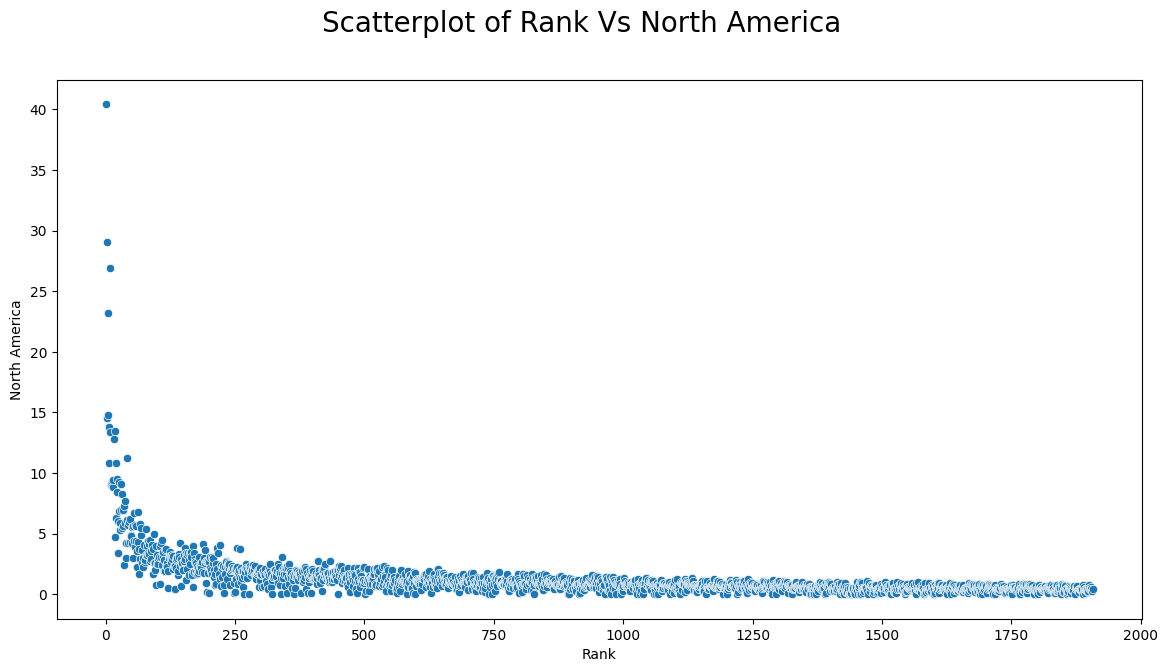

In [282]:
#comparing the dataset between the Rank Vs North America.
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='North America')
plt.suptitle('Scatterplot of Rank Vs North America',fontsize=20)

Text(0.5, 0.98, 'Scatterplot of Rank Vs Japan')

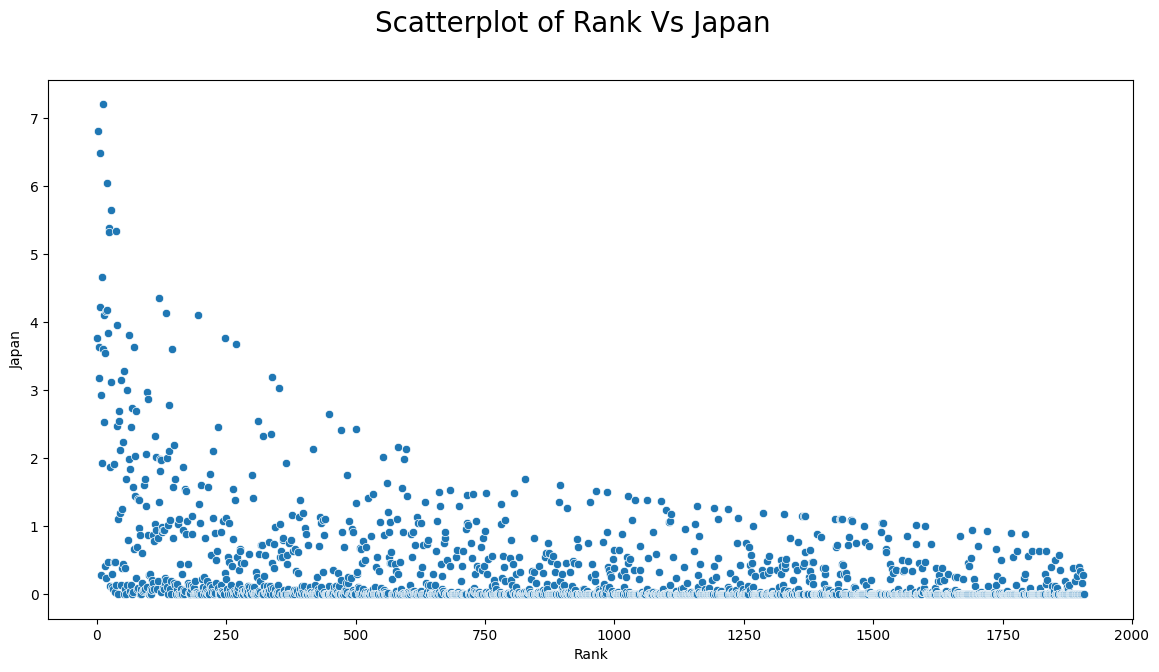

In [283]:
#comparing the dataset between the Rank Vs North America.
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='Japan')
plt.suptitle('Scatterplot of Rank Vs Japan',fontsize=20)

Text(0.5, 0.98, 'Scatterplot of Rank Vs ROW')

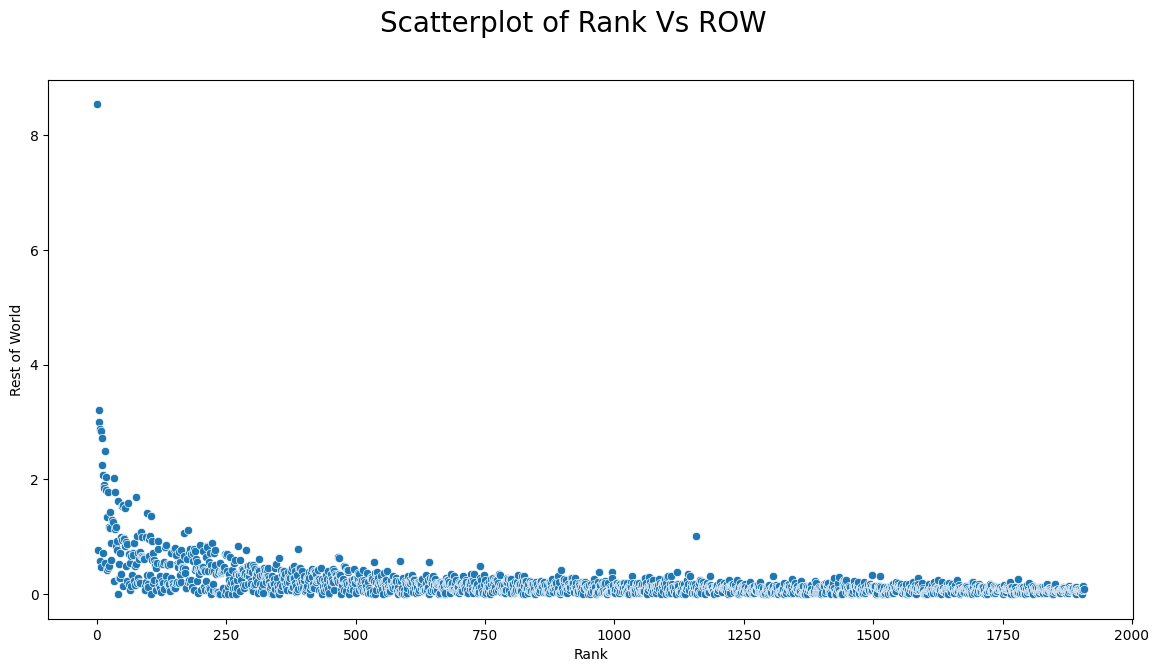

In [284]:
#comparing the dataset between the Rank Vs North America.
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='Rest of World')
plt.suptitle('Scatterplot of Rank Vs ROW',fontsize=20)

# Correlation Analysis

In [285]:
#Getting only the numerical values in a dataset.
num_data=['Rank','Year','North America','Europe','Japan','Rest of World','Global','Review']

Text(0.5, 0.98, 'Correlation of the dataset')

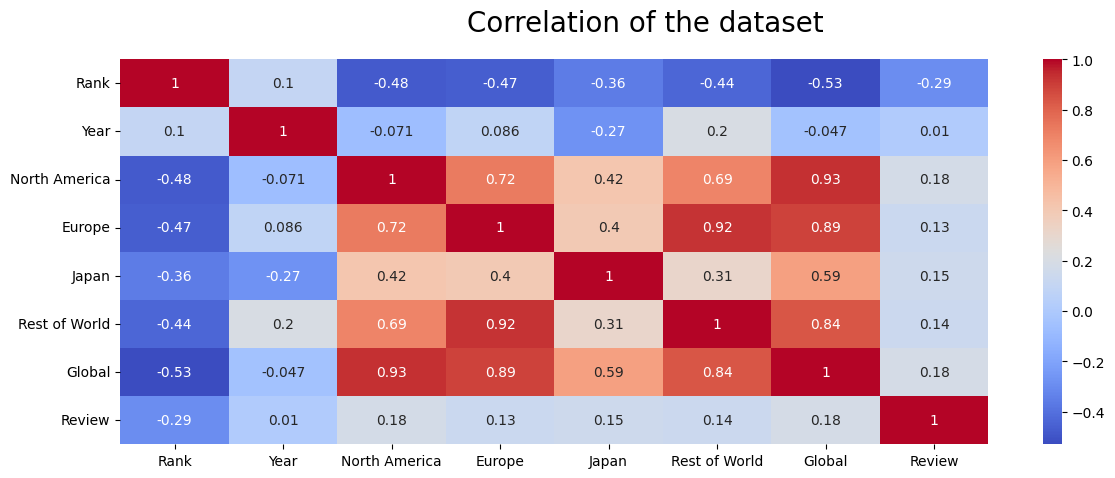

In [286]:
#Getting the correlation of the numeric dataset using the heatmap.
plt.figure(figsize=(14,5))
sns.heatmap(dataset[num_data].corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the dataset',fontsize=20)

# Grouping & Aggregation

In [287]:
#Using the plotly library.
import plotly.express as px

In [288]:
# Group by Genre and sum up the Global sales
genre_sales = dataset.groupby('Genre')['Global'].sum().reset_index()
genre_sales


,Genre,Global
0,Action,637.27
1,Adventure,239.45
2,Fighting,249.00
3,Misc,426.12
4,Platform,595.24
5,Puzzle,108.65
6,Racing,451.80
7,Role-Playing,496.20
8,Shooter,557.20
9,Simulation,205.14


In [289]:
# Create a bar chart showing global sales by Genre
fig = px.bar(genre_sales, x='Genre', y='Global', title='Global Sales by Genre')
fig.show()

In [290]:
# Group by Platform and calculate the average Review score
platform_reviews = dataset.groupby('Platform')['Review'].mean().reset_index()
platform_reviews


,Platform,Review
0,3DS,81.246000
1,DC,91.545000
2,DS,73.234430
3,GB,78.637917
4,GBA,75.041200
5,GC,80.737818
6,GEN,86.090909
7,N64,81.261404
8,NES,76.245000
9,PC,84.619437


In [291]:
# Create a bar chart showing average review scores by Platform
fig = px.bar(platform_reviews, x='Platform', y='Review', title='Average Review Score by Platform')
fig.show()

In [292]:
# Group by Genre and sum Global sales
genre_sales = dataset.groupby('Genre')['Global'].sum().reset_index()
genre_sales = genre_sales.sort_values(by='Global', ascending=False)
genre_sales

,Genre,Global
10,Sports,703.11
0,Action,637.27
4,Platform,595.24
8,Shooter,557.20
7,Role-Playing,496.20
6,Racing,451.80
3,Misc,426.12
2,Fighting,249.00
1,Adventure,239.45
9,Simulation,205.14


Text(0, 0.5, 'Genre')

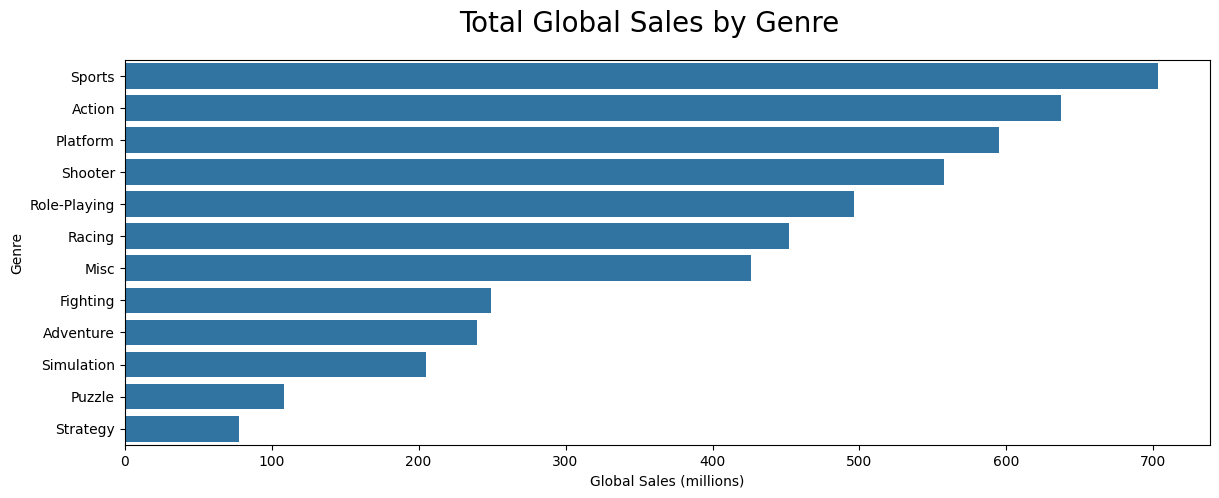

In [293]:
plt.figure(figsize=(14, 5))
sns.barplot(x='Global', y='Genre', data=genre_sales)
plt.suptitle('Total Global Sales by Genre',fontsize=20)
plt.xlabel('Global Sales (millions)')
plt.ylabel('Genre')

In [294]:
platform_year_sales = dataset.groupby(['Platform', 'Year'])['Global'].sum().unstack()
platform_year_sales

Year,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Platform,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.69,11.06
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.21,110.93,86.27,81.98,64.07,50.73,35.29,5.93,6.38
GB,NaN,NaN,NaN,NaN,NaN,1.43,60.10,4.56,2.90,25.25,...,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32.39,36.26,7.13,NaN,1.21,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.91,13.77,11.06,3.48,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.60,4.34,12.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NES,10.96,45.66,49.57,27.17,17.06,40.76,2.77,13.16,2.98,1.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


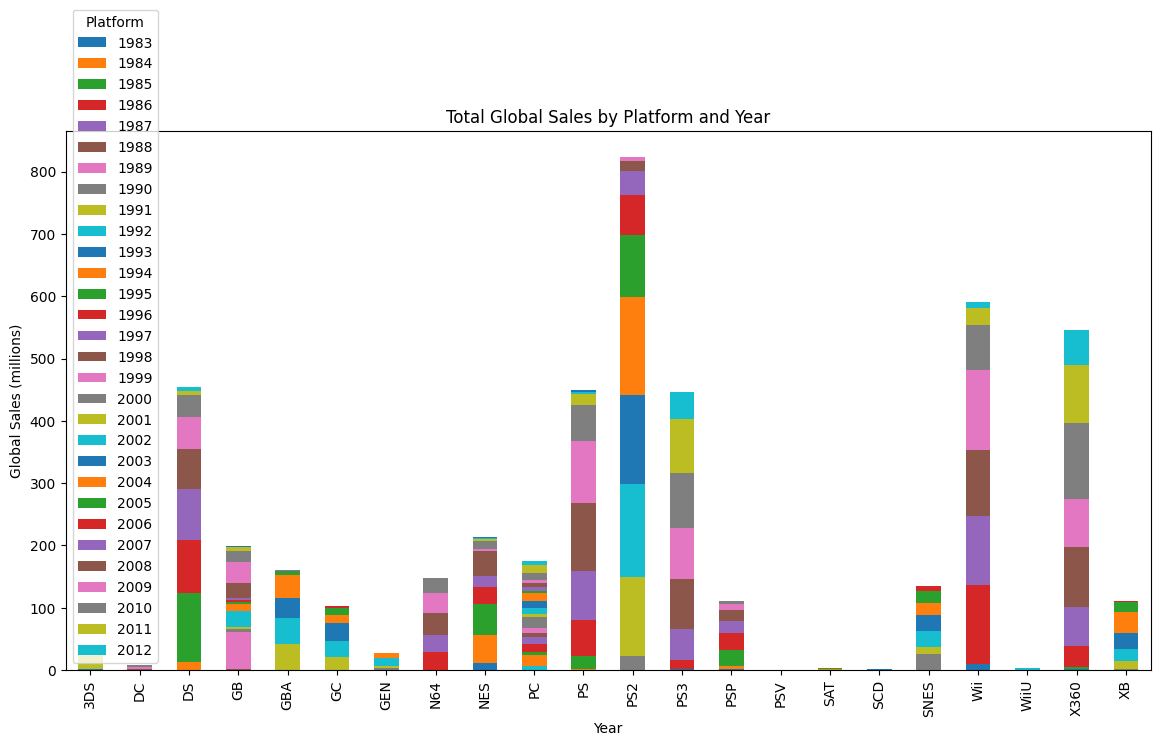

In [295]:
platform_year_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Total Global Sales by Platform and Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.legend(title='Platform')

In [296]:
# Group by Genre and Platform, summing Global sales
genre_platform_sales = dataset.groupby(['Genre', 'Platform'])['Global'].sum().unstack(fill_value=0)
genre_platform_sales

Platform,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,PC,...,PS3,PSP,PSV,SAT,SCD,SNES,Wii,WiiU,X360,XB
Genre,,,,,,,,,,,,,,,,,,,,,
Action,4.38,1.14,19.25,1.73,13.06,14.14,2.60,7.89,9.14,2.92,...,122.67,23.14,0.93,0.00,0.0,2.58,26.21,3.36,95.13,22.10
Adventure,4.06,1.18,41.75,11.59,13.58,8.06,0.00,10.96,13.62,14.70,...,19.93,4.15,0.00,0.00,0.0,6.03,23.27,0.00,20.40,2.05
Fighting,0.90,0.00,0.00,0.00,1.08,9.61,5.67,15.81,6.47,0.00,...,27.62,5.90,0.00,3.00,0.0,19.06,14.52,0.00,20.53,3.73
Misc,0.00,0.00,89.63,8.50,8.94,10.97,0.00,8.56,2.14,8.87,...,13.83,2.40,0.00,0.00,0.0,2.75,137.43,0.00,49.74,3.03
Platform,13.87,2.42,62.32,64.73,49.61,16.98,15.36,30.62,87.99,0.00,...,16.10,10.89,0.00,0.00,1.5,61.80,75.76,0.00,6.69,2.13
Puzzle,0.00,0.00,18.15,44.77,7.05,2.98,0.00,1.04,16.13,0.00,...,0.00,1.10,0.00,0.00,0.0,1.70,6.92,0.00,0.00,0.00
Racing,7.71,1.81,24.57,4.55,8.63,12.83,0.00,25.49,7.64,0.00,...,42.87,18.93,0.00,1.16,0.0,12.51,38.65,0.00,38.24,13.58
Role-Playing,2.32,0.00,103.01,48.56,51.98,8.63,0.00,1.38,15.30,38.04,...,29.00,17.17,0.00,0.00,0.0,18.26,4.44,0.00,46.21,9.98
Shooter,0.00,0.00,1.00,1.20,0.00,5.23,0.00,14.42,30.85,21.72,...,115.75,10.61,0.00,0.00,0.0,4.64,19.33,0.00,198.56,35.44


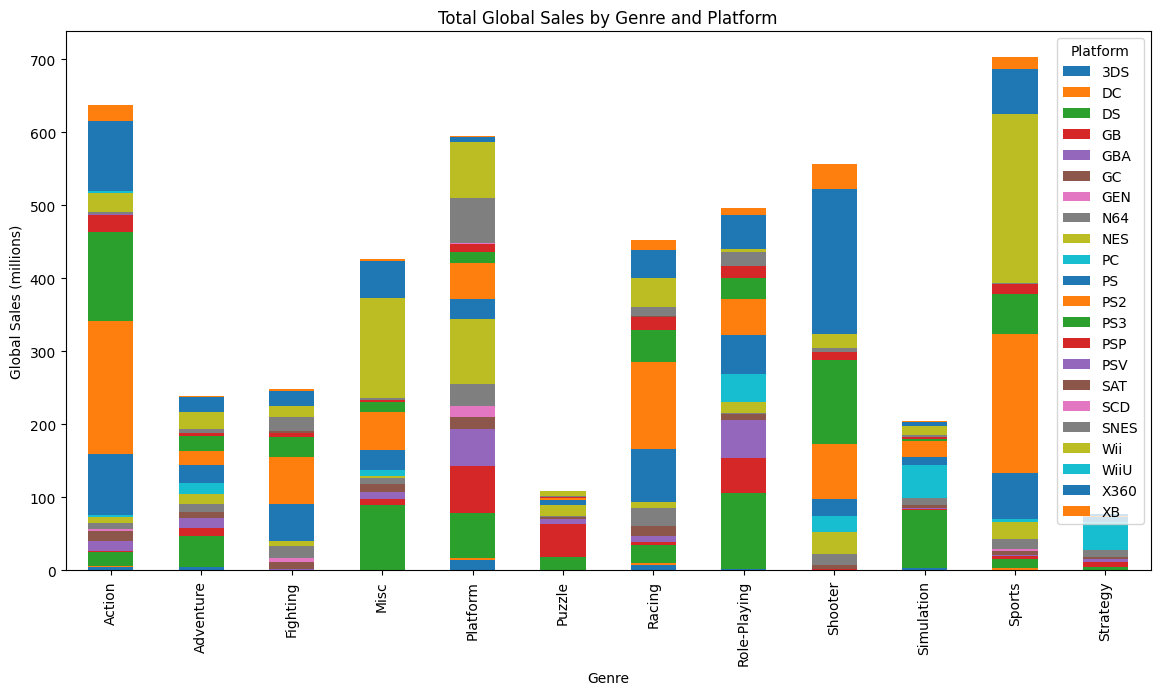

In [297]:
genre_platform_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Total Global Sales by Genre and Platform')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.legend(title='Platform')

In [298]:
# Group by Year and sum sales across regions
yearly_region_sales = dataset.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()
yearly_region_sales

,Year,North America,Europe,Japan,Rest of World
0,1983,2.32,0.46,8.10,0.08
1,1984,32.15,1.85,11.00,0.65
2,1985,32.09,4.45,12.13,0.90
3,1986,10.59,2.60,13.58,0.40
4,1987,5.28,1.18,10.42,0.18
5,1988,21.49,6.26,13.55,0.90
6,1989,39.31,7.33,14.85,1.37
7,1990,23.59,7.44,14.04,1.39
8,1991,10.87,3.67,6.25,0.62
9,1992,36.22,12.76,20.65,1.84


In [299]:
# Create a line plot for regional sales by year
fig = px.line(yearly_region_sales, x='Year', y=yearly_region_sales.columns[1:],
              title='Regional Sales by Year')
fig.show()

In [300]:
# Aggregate sales by region
region_sales = dataset[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()

# Rename columns for readability
region_sales.columns = ['Region', 'Sales']

# For visualization, we will map regions to countries (ISO 3166-1 alpha-3 codes)
region_codes = {
    'North America': 'USA',  # Example: You could aggregate USA, Canada, Mexico into this category
    'Europe': 'EUU',  # Placeholder for Europe; you can split or map specific countries if needed
    'Japan': 'JPN',   # Japan code
    'Rest of World': 'ROW'  # You could specify additional regions or leave this as "Rest of World"
}

# Map the region names to their respective country codes
region_sales['Country_Code'] = region_sales['Region'].map(region_codes)

# Create the choropleth map
fig = px.choropleth(region_sales,
                    locations='Country_Code',
                    color='Sales',
                    hover_name='Region',
                    color_continuous_scale='Viridis',
                    title="Regional Sales in Video Games")

# Show the map
fig.show()

# Predicting the dataset using Un-supervised Algorithm

In [301]:
#importing the sklearn library for performing the machine learning libraries.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, SpectralClustering

In [302]:
#Since we are going to perform only unsupervised only object data type is preprocessed
lab=LabelEncoder()

In [303]:
#Preprocessing only the object column in the dataset.
dataset['Game Title']=lab.fit_transform(dataset['Game Title'])
dataset['Platform']=lab.fit_transform(dataset['Platform'])
dataset['Genre']=lab.fit_transform(dataset['Genre'])
dataset['Publisher']=lab.fit_transform(dataset['Publisher'])

In [304]:
#Looking for the dataset once it is preprocessed
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,1456,18,2006,10,53,40.43,28.39,3.77,8.54,81.12,76.28
1,2,1193,8,1985,4,53,29.08,3.58,6.81,0.77,40.24,91.00
2,3,630,18,2008,6,53,14.50,12.22,3.63,3.21,33.55,82.07
3,4,1457,18,2009,10,53,14.82,10.51,3.18,3.01,31.52,82.65
4,5,1254,3,1989,5,53,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,574,4,2004,0,22,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,1483,18,2010,7,53,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,1066,12,2008,3,69,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,311,11,2000,10,24,0.27,0.21,0.28,0.07,0.83,73.00


In [305]:
#Creating the KMeans un-supervised model
model=KMeans()

In [306]:
#Fitting the dataset to the model.
model.fit(dataset)

KMeans()

In [307]:
#Checking for the clustered label's in the k-means
model.labels_

array([4, 4, 2, ..., 7, 1, 7], dtype=int32)

In [308]:
model.cluster_centers_

array([[9.43734440e+02, 1.22666390e+03, 1.10000000e+01, 2.00264730e+03,
        5.08713693e+00, 4.67302905e+01, 8.42323651e-01, 4.53900415e-01,
        1.54273859e-01, 1.25103734e-01, 1.57522822e+00, 7.78506224e+01],
       [1.63201714e+03, 2.16617143e+02, 1.19657143e+01, 2.00460571e+03,
        5.36000000e+00, 4.01885714e+01, 4.34114286e-01, 3.07714286e-01,
        1.49485714e-01, 9.34285714e-02, 9.84685714e-01, 7.60698857e+01],
       [2.70355172e+02, 3.32517241e+02, 1.22793103e+01, 2.00431724e+03,
        5.28620690e+00, 4.72275862e+01, 2.49027586e+00, 1.51534483e+00,
        5.87241379e-01, 4.71241379e-01, 5.06410345e+00, 8.30305172e+01],
       [1.55506000e+03, 7.26324000e+02, 1.09240000e+01, 2.00430400e+03,
        6.17600000e+00, 4.54560000e+01, 5.56440000e-01, 2.75280000e-01,
        1.16600000e-01, 8.60400000e-02, 1.03432000e+00, 7.73106000e+01],
       [2.85711382e+02, 1.20371951e+03, 9.82113821e+00, 2.00195122e+03,
        4.63008130e+00, 4.87601626e+01, 2.84731707e+00, 1.61

In [309]:
model_1=MiniBatchKMeans()

In [310]:
#Importing the 2nd model
model_1.fit(dataset)

MiniBatchKMeans()

In [311]:
#checking for the clustered lables
model_1.labels_

array([3, 3, 2, ..., 5, 4, 5], dtype=int32)

In [312]:
model_1.cluster_centers_

array([[1.08193368e+03, 2.45654744e+02, 1.16582216e+01, 2.00397740e+03,
        4.97665176e+00, 4.23445107e+01, 6.66666667e-01, 4.02429210e-01,
        2.19850969e-01, 1.27908594e-01, 1.41660209e+00, 7.59403676e+01],
       [7.46973081e+02, 7.65369148e+02, 1.16296816e+01, 2.00366690e+03,
        5.79892322e+00, 4.45737360e+01, 1.06134597e+00, 4.50189607e-01,
        2.38300562e-01, 1.53026685e-01, 1.90297051e+00, 8.00084785e+01],
       [2.91426166e+02, 3.42271281e+02, 1.23528868e+01, 2.00424130e+03,
        5.20854922e+00, 4.70049963e+01, 2.43554034e+00, 1.42682642e+00,
        5.61076980e-01, 4.43850851e-01, 4.86710770e+00, 8.30197409e+01],
       [2.69150248e+02, 1.19396188e+03, 9.79554455e+00, 2.00211485e+03,
        4.48564356e+00, 4.89980198e+01, 2.93333416e+00, 1.67106188e+00,
        8.65626238e-01, 4.12420792e-01, 5.88193812e+00, 8.46184629e+01],
       [1.69582313e+03, 3.51171376e+02, 1.14288331e+01, 2.00517713e+03,
        5.65463108e+00, 4.17176871e+01, 4.74141811e-01, 2.79

In [313]:
#Importing the 3rd model
model_2=AgglomerativeClustering()

In [314]:
#Fitting the dataset
model_2.fit(dataset)

AgglomerativeClustering()

In [315]:
#Getting the clustered values.
model_2.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [316]:
#Inserting the clustered values of each model to the dataset.
dataset['kmeans']=model.labels_
dataset['minibatchkmeans']=model_1.labels_
dataset['agglo']=model_2.labels_

In [317]:
#Viewing the dataset
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,kmeans,minibatchkmeans,agglo
0,1,1456,18,2006,10,53,40.43,28.39,3.77,8.54,81.12,76.28,4,3,0
1,2,1193,8,1985,4,53,29.08,3.58,6.81,0.77,40.24,91.00,4,3,0
2,3,630,18,2008,6,53,14.50,12.22,3.63,3.21,33.55,82.07,2,2,0
3,4,1457,18,2009,10,53,14.82,10.51,3.18,3.01,31.52,82.65,4,3,0
4,5,1254,3,1989,5,53,23.20,2.26,4.22,0.58,30.26,88.00,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,574,4,2004,0,22,0.60,0.22,0.00,0.01,0.83,55.00,3,4,1
1903,1904,1483,18,2010,7,53,0.39,0.22,0.16,0.07,0.83,91.74,7,5,1
1904,1905,1066,12,2008,3,69,0.25,0.44,0.00,0.14,0.83,73.00,7,5,1
1905,1906,311,11,2000,10,24,0.27,0.21,0.28,0.07,0.83,73.00,1,4,1


# Visualizing the Clustered value.

Text(0.5, 0.98, 'Comparing the clustered data with the Global Vs Review data using KMeans')

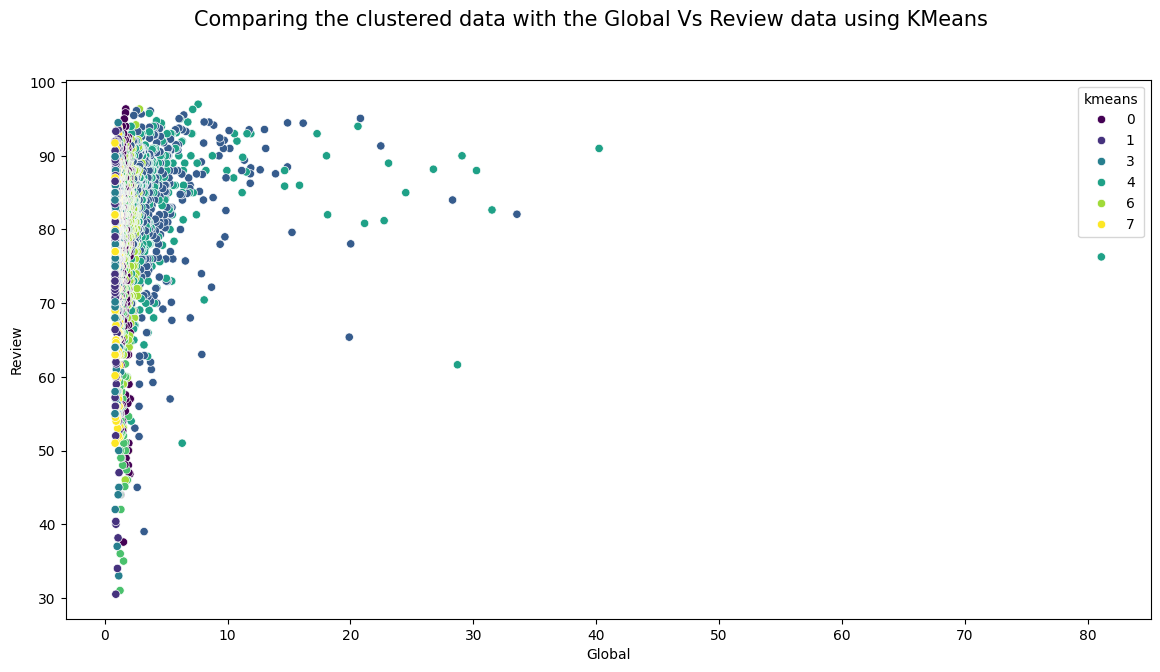

In [318]:
#Comparing the clustered data with the Global Vs Review data's
plt.figure(figsize=(14,7))
sns.scatterplot(data=dataset,x='Global',y='Review',hue='kmeans',palette="viridis")
plt.suptitle('Comparing the clustered data with the Global Vs Review data using KMeans',fontsize=15)

Text(0.5, 0.98, 'Comparing the clustered data with the Global Vs Review data using MiniKBatch')

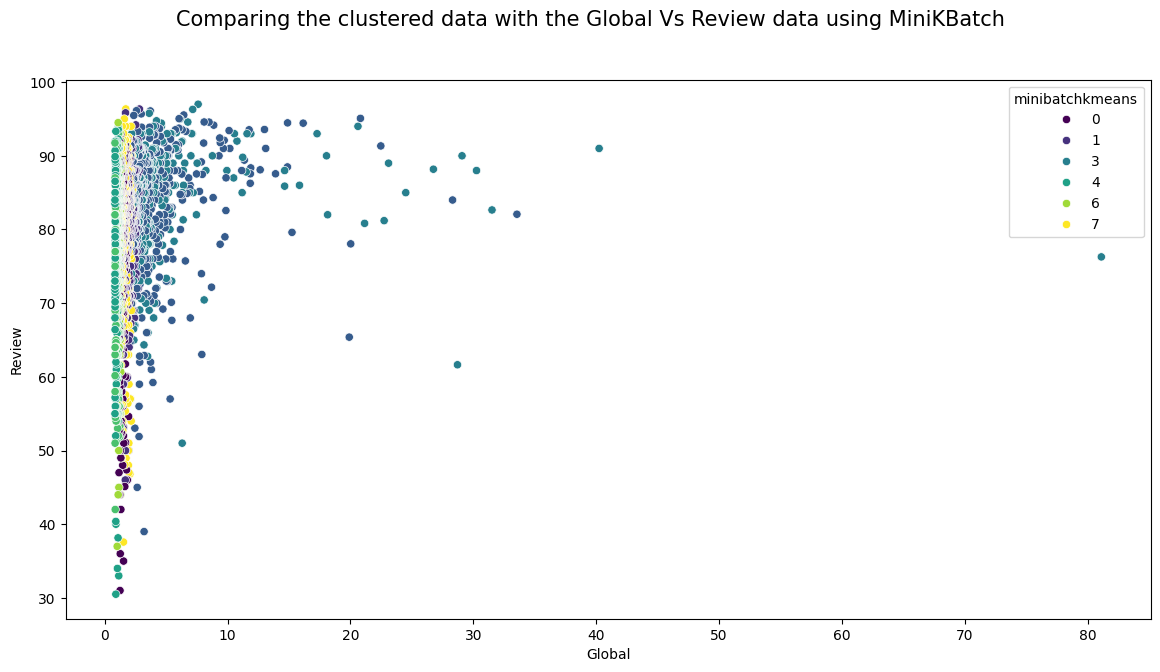

In [319]:
#Comparing the clustered data with the Global Vs Review data's
plt.figure(figsize=(14,7))
sns.scatterplot(data=dataset,x='Global',y='Review',hue='minibatchkmeans',palette="viridis")
plt.suptitle('Comparing the clustered data with the Global Vs Review data using MiniKBatch',fontsize=15)

Text(0.5, 0.98, 'Comparing the clustered data with the Global Vs Review data using Aggloramative_Clustering')

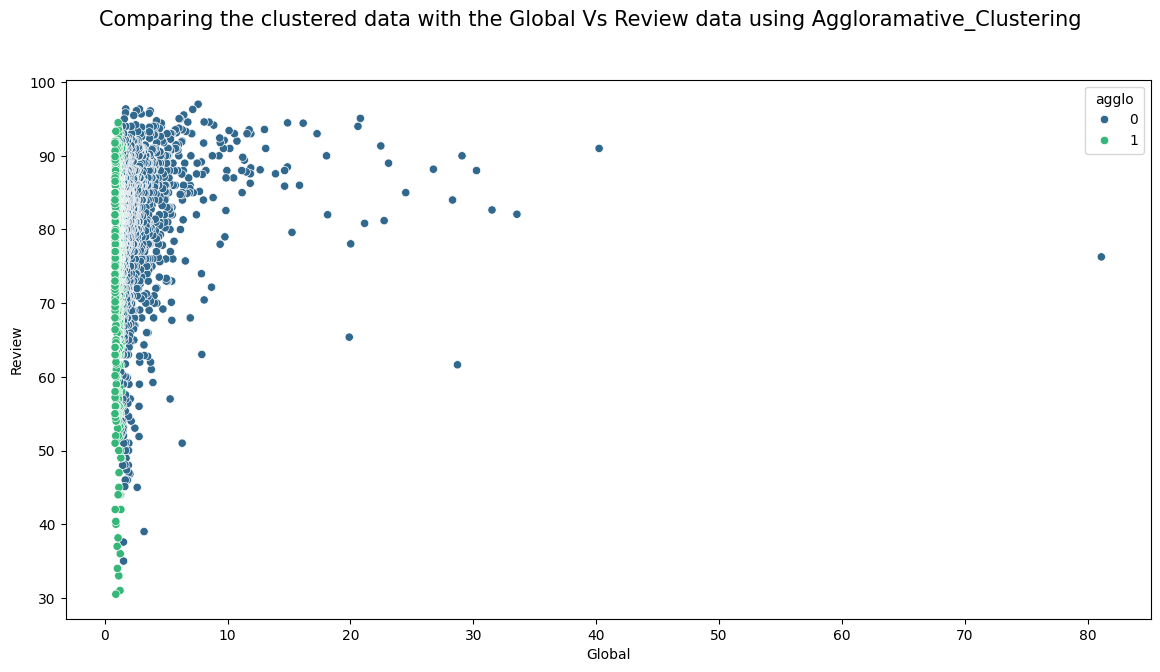

In [320]:
#Comparing the clustered data with the Global Vs Review data's
plt.figure(figsize=(14,7))
sns.scatterplot(data=dataset,x='Global',y='Review',hue='agglo',palette="viridis")
plt.suptitle('Comparing the clustered data with the Global Vs Review data using Aggloramative_Clustering',fontsize=15)

###**-------- THE END ----------**